In [52]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from skimage.filters import unsharp_mask, meijering, sato, scharr, hessian
from skimage.exposure import exposure, equalize_hist, equalize_adapthist
import cv2 as cv
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


In [53]:
PATH = "C:/Users/dtmt1/Desktop/assingment/softsensor_aiprojectassignment/X_ray_image"
image_names = os.listdir(PATH)

full_path = []
for i in range(len(image_names)):
  full_path.append(PATH + '/' + image_names[i])

random.shuffle(full_path)

#Getting only 10 random images
images = full_path[:10]


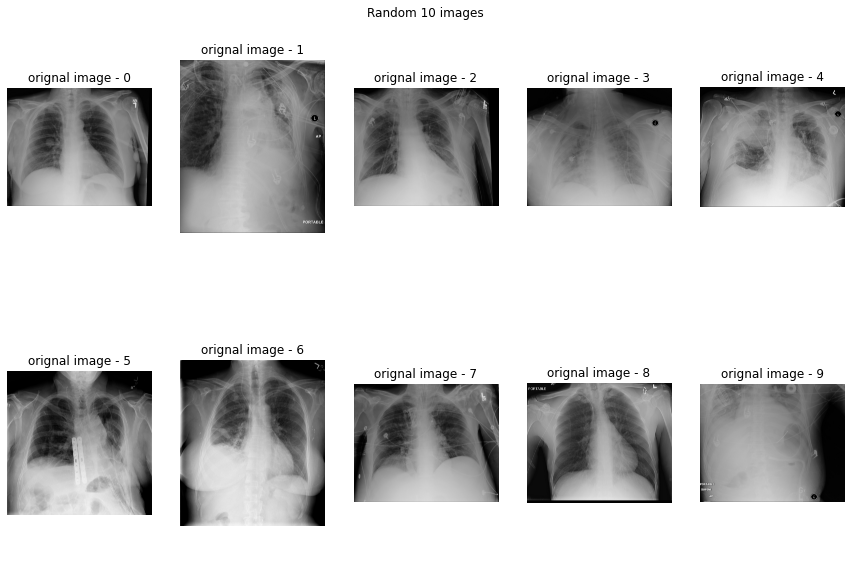

In [54]:
fig = plt.figure(figsize=(15, 10))
plt.title('Random 10 images')
plt.axis(False)

columns = 5
rows = 2

for image in range(len(images)):
    img = cv.imread(images[image])
    fig.add_subplot(rows, columns, image+1)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f'orignal image - {image}')


# Choose Image to apply_filter

In [104]:
pick_image_number = 5

image = cv.imread(images[pick_image_number])
x, y, z = image.shape
image_data = image.flatten()


In [105]:
#Function to plot diagrams

def plot_image(filter_name, filtered_img_data, img_data=image):

  fig = plt.figure(figsize=(15, 10))

  fig.add_subplot(2, 2, 1)
  plt.imshow(img_data)
  plt.axis(False)
  plt.title('Orignal Image')

  fig.add_subplot(2, 2, 2)
  plt.hist(img_data.ravel())
  plt.title('Orignal Distribution')
  

  fig.add_subplot(2, 2, 3)
  plt.imshow(filtered_img_data)
  plt.axis(False)
  plt.title(f'{filter_name} Image')

  fig.add_subplot(2, 2, 4)
  plt.hist(filtered_img_data.ravel())
  plt.title(f'{filter_name} Distribution')
  
  plotted_images = fig.show()
  return plotted_images


# 1. Histogram Equalization

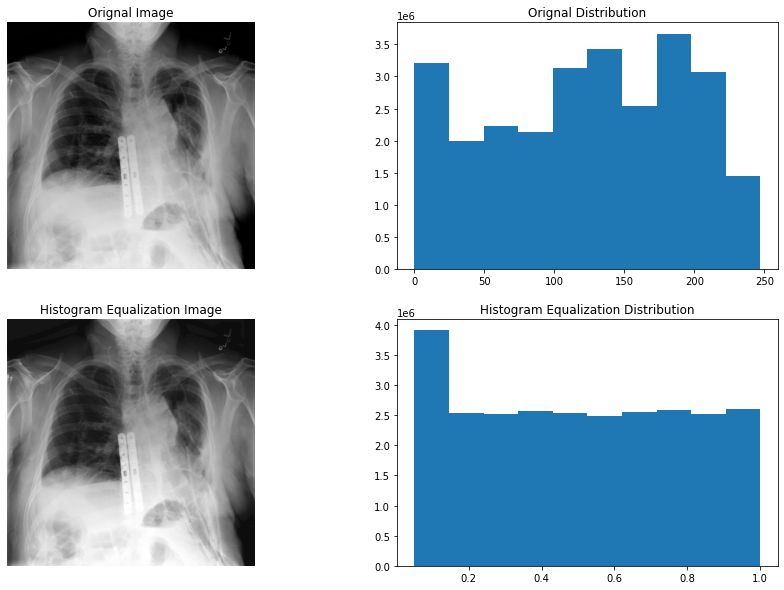

In [106]:
equalize_hist_data = equalize_hist(image_data, nbins=256, mask=None)

equalize_hist_filtered_image = equalize_hist_data.reshape(x, y, z)


plot_image('Histogram Equalization', equalize_hist_filtered_image)



# 2. Equalize Adapthist


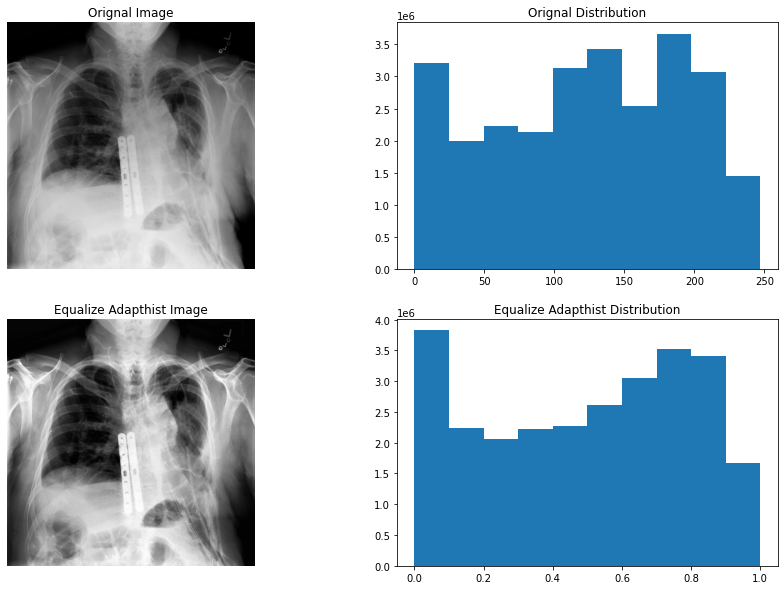

In [107]:
equalize_adapthist_data = equalize_adapthist(image_data, kernel_size=None, clip_limit=0.01, nbins=256)

equalize_adapthist_filtered_image = equalize_adapthist_data.reshape(x, y, z)

plot_image('Equalize Adapthist', equalize_adapthist_filtered_image)


# 3. Unsharp Mask

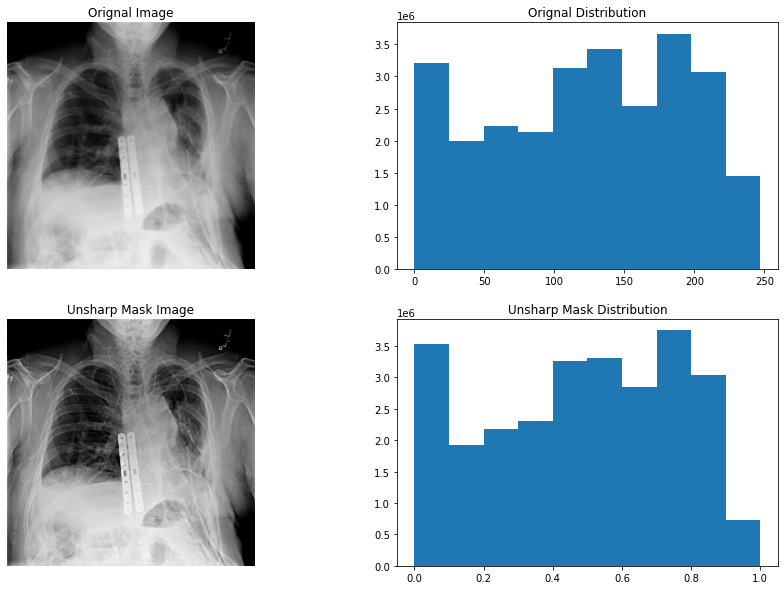

In [108]:
unsharp_mask_data = unsharp_mask(image, radius=20, amount=1)

unsharp_mask_filtered_image = unsharp_mask_data.reshape(x, y, z)

plot_image('Unsharp Mask', unsharp_mask_filtered_image)


# 4. Meijering 

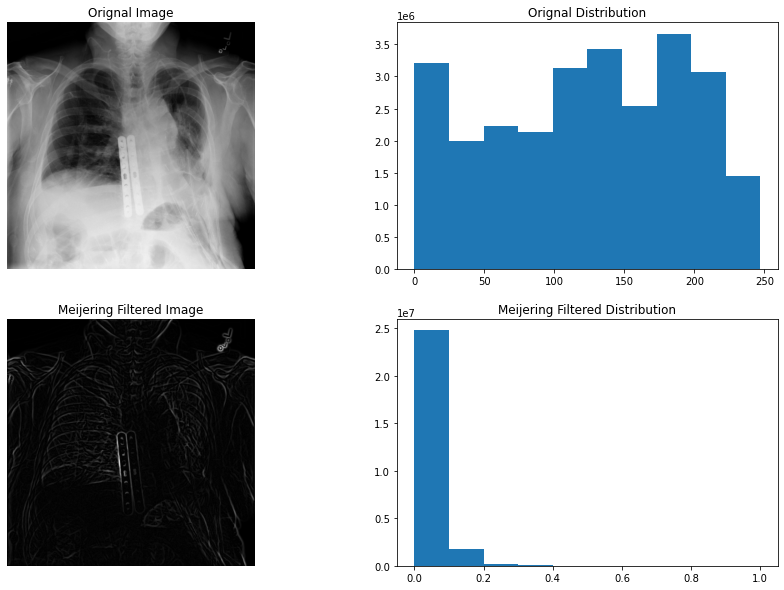

In [109]:
meijering_data = meijering(image, sigmas=range(
    1, 10, 2), alpha=None, black_ridges=True, mode='reflect', cval=0)


meijering_filtered_image = meijering_data.reshape(x, y, z)

plot_image('Meijering Filtered', meijering_filtered_image)


# Applying Equalize hist for better visulization!!
#### (in below plot orignal image is Meijering Filtered)

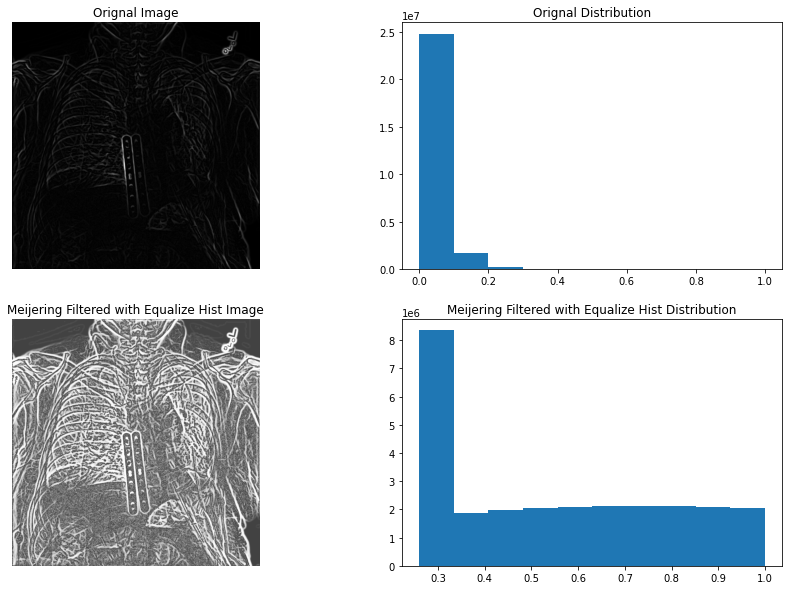

In [110]:
''' 
Below is Diffrent equalize methods you can play with hyper parameters to get interesting insights!
'''

# meijering_data_with_hist = equalize_adapthist(
#     meijering_data, kernel_size=None, clip_limit=0.01, nbins=256)
# meijering_filtered_image_with_hist = meijering_data_with_hist.reshape(x, y, z)


meijering_data_with_hist1 = equalize_hist(meijering_data, nbins=256, mask=None)

meijering_filtered_image_with_hist1 = meijering_data_with_hist1.reshape(x, y, z)
plot = plot_image('Meijering Filtered with Equalize Hist',
                  meijering_filtered_image_with_hist1, meijering_filtered_image)


# 5. Sato
#### Also applying Equalize Hist for better visulization

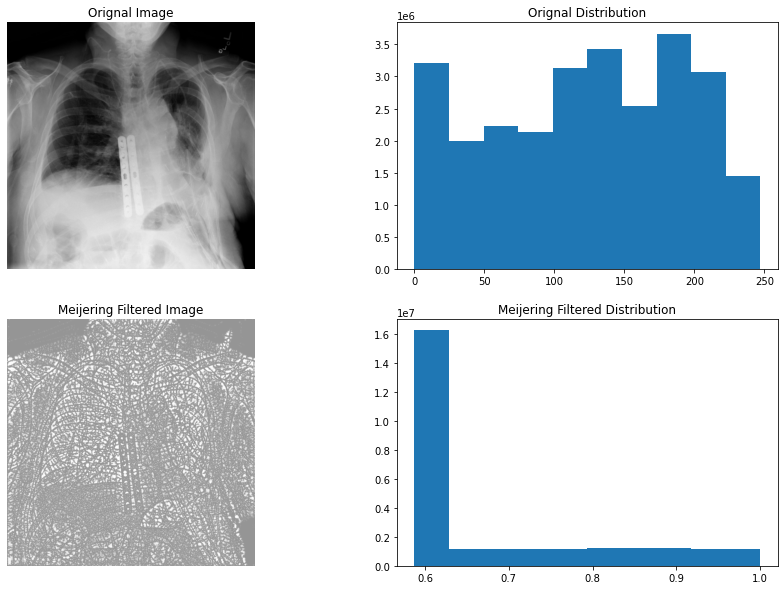

In [111]:
sato_data = sato(image, sigmas=range(1, 10, 2),
                      black_ridges=True, mode='reflect', cval=0)

sato_data = equalize_hist(sato_data, nbins=256, mask=None)

# sato_data = equalize_adapthist(
#     sato_data, kernel_size=None, clip_limit=0.01, nbins=256)

sato_filtered_image = sato_data.reshape(x, y, z)

plot_image('Meijering Filtered', sato_filtered_image)


# 6. Scharr


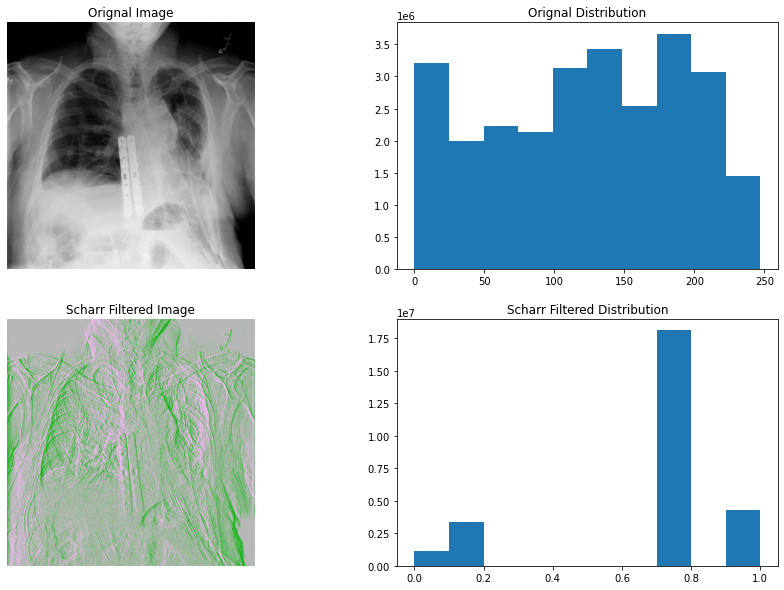

In [112]:
scharr_data = scharr(image_data, mask=None, axis=None,
                     mode='reflect', cval=0.0)

scharr_data = equalize_hist(scharr_data, nbins=256, mask=None)
# scharr_data = equalize_adapthist(
#     scharr_data, kernel_size=None, clip_limit=0.01, nbins=256)

scharr_filtered_image = scharr_data.reshape(x, y, z)

plot_image('Scharr Filtered', scharr_filtered_image)


# 7. Hessian

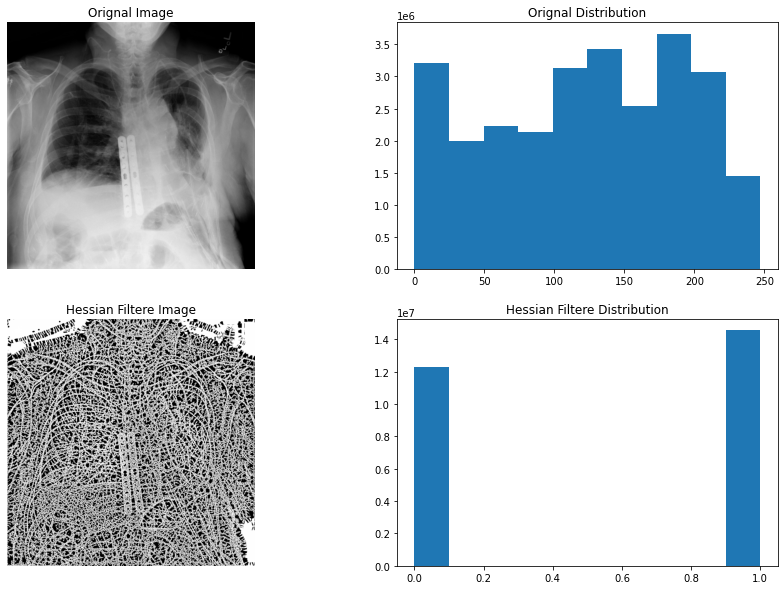

In [113]:
hessian_data = hessian(image, sigmas=range(1, 10, 2), scale_range=None, scale_step=None,
                      alpha=0.5, beta=0.5, gamma=15, black_ridges=True, mode='reflect', cval=0)

# hessian_data = equalize_hist(hessian_data, nbins=256, mask=None)

hessian_data =  equalize_adapthist(
    hessian_data, kernel_size=None, clip_limit=0.01, nbins=256)

hessian_filtered_image = hessian_data.reshape(x, y, z)

plot_image('Hessian Filtere', hessian_filtered_image)


#### since I'm not sure what type of filters or mask you guys asked in assignment so choose advance filters from skimage library

### •	Which filter will you prefer for the detect and visualization of catheters and lines in X-ray images and why?

#### -> I would pick verticle or horizontal eadge detection filters because catheters and lines can easy to detect with filter. It's simillar to Meijering (4th method) 

### •	How can deep learning help to detect presence of catheters and lines in images and which model you prefer?( coding is not required)

#### -> Deep learning can help us detect so many diffrent kind of lungs disease or any other disease if given data-set is suitable for that problem.
####   I choose CNN model of ANN if I'm building model from scratch and I choose Inception v3(pre-trained model) if I am doing transfer learning. 
